In [1]:
#Relevant imports
import os
import cv2
import matplotlib.pyplot as plt
%matplotlib inline
import random
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from xgboost import XGBClassifier
import time
from sklearn import metrics
import warnings
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.dummy import DummyClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import StackingClassifier
import seaborn as sns
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.cluster import KMeans
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import GaussianNB

In [2]:
#Training set
sub1Spont = pd.read_csv('Data/Hand Positioning/Training/Evyatar Cohen/Evyatar636771052727603804Spontan.csv')
sub1Sync = pd.read_csv('Data/Hand Positioning/Training/Evyatar Cohen/Evyatar636771053639929594Sync.csv')
sub1Alone = pd.read_csv('Data/Hand Positioning/Training/Evyatar Cohen/Evyatar636771054555711409Alone.csv')

sub2Spont = pd.read_csv('Data/Hand Positioning/Training/Nofar Social_Nuero/Nofar636759795182793299Spontan.csv')
sub2Sync = pd.read_csv('Data/Hand Positioning/Training/Nofar Social_Nuero/Nofar636759797397919664Sync.csv')
sub2Alone = pd.read_csv('Data/Hand Positioning/Training/Nofar Social_Nuero/Nofar636759796290435160Alone.csv')

sub3Spont = pd.read_csv('Data/Hand Positioning/Training/Oriya Social_Nuero/Oriya636759804404113837Spontan.csv')
sub3Sync = pd.read_csv('Data/Hand Positioning/Training/Oriya Social_Nuero/Oriya636759806131350399Sync.csv')
sub3Alone = pd.read_csv('Data/Hand Positioning/Training/Oriya Social_Nuero/Oriya636759805268396661Alone.csv')

sub4Alone = pd.read_csv('Data/Hand Positioning/Training/Orya Kalmanovitz/OryaB636771082736601528Alone.csv')
sub4Spont = pd.read_csv('Data/Hand Positioning/Training/Orya Kalmanovitz/OryaB636771083605535985Spontan.csv')
sub4Sync = pd.read_csv('Data/Hand Positioning/Training/Orya Kalmanovitz/OryaB636771084494502229Sync.csv')

sub5Alone = pd.read_csv('Data/Hand Positioning/Training/Revital Marbel/Revital636770955999435879Alone.csv')
sub5Spont = pd.read_csv('Data/Hand Positioning/Training/Revital Marbel/Revital636770957038873193Spontan.csv')
sub5Sync = pd.read_csv('Data/Hand Positioning/Training/Revital Marbel/Revital636770957894370062Sync.csv')

sub6Spont = pd.read_csv('Data/Hand Positioning/Training/Shahar Terner/Sachar636771045591258071Spontan.csv')
sub6Sync = pd.read_csv('Data/Hand Positioning/Training/Shahar Terner/Sachar636771046527112972Sync.csv')
sub6Alone = pd.read_csv('Data/Hand Positioning/Training/Shahar Terner/Sachar636771047408504303Alone.csv')

sub7Spont = pd.read_csv('Data/Hand Positioning/Training/Shelly Social_Nuero/Shelly636759787508979097Spontan.csv')
sub7Sync = pd.read_csv('Data/Hand Positioning/Training/Shelly Social_Nuero/Shelly636759789526313406Sync.csv')
sub7Alone = pd.read_csv('Data/Hand Positioning/Training/Shelly Social_Nuero/Shelly636759788383205274Alone.csv')

sub8Spont = pd.read_csv('Data/Hand Positioning/Training/Yael Hagai/Yael636771059544754823Spontan.csv')
sub8Sync = pd.read_csv('Data/Hand Positioning/Training/Yael Hagai/Yael636771060699529085Sync.csv')
sub8Alone = pd.read_csv('Data/Hand Positioning/Training/Yael Hagai/Yael636771061659067649Alone.csv')

sub9Spont = pd.read_csv('Data/Hand Positioning/Training/Yoel Raz/Yoel636760921663075813Spontan.csv')
sub9Sync = pd.read_csv('Data/Hand Positioning/Training/Yoel Raz/Yoel636760923490742912Sync.csv')
sub9Alone = pd.read_csv('Data/Hand Positioning/Training/Yoel Raz/Yoel636760922573364655Alone.csv')
#27 dataframes

handRight = pd.read_csv('Data/Hand Positioning/HandRight.csv')

#Final Test Set
sub1TestSpont = pd.read_csv('Data/Hand Positioning/Validation/Itiel Lab/Itiel636770940701219076Spontan.csv')
sub1TestSync = pd.read_csv('Data/Hand Positioning/Validation/Itiel Lab/Itiel636770941638547912Sync.csv')
sub1TestAlone = pd.read_csv('Data/Hand Positioning/Validation/Itiel Lab/Itiel636770942529041679Alone.csv')

sub2TestSpont = pd.read_csv('Data/Hand Positioning/Validation/Mor SHerman/Mor636771064635567065Spontan.csv')
sub2TestSync = pd.read_csv('Data/Hand Positioning/Validation/Mor SHerman/Mor636771065531910215Sync.csv')
sub2TestAlone = pd.read_csv('Data/Hand Positioning/Validation/Mor SHerman/Mor636771066407626524Alone.csv')

sub3TestSpont = pd.read_csv('Data/Hand Positioning/Validation/Oded Medina/Oded636754670490266956Spontan.csv')
sub3TestSync = pd.read_csv('Data/Hand Positioning/Validation/Oded Medina/Oded636754671560850581Sync.csv')
sub3TestAlone = pd.read_csv('Data/Hand Positioning/Validation/Oded Medina/Oded636754669540564461Alone.csv')

In [3]:
# sub1Spont['label'] = 1
# sub2Spont['label'] = 1
# sub3Spont['label'] = 1
# sub4Spont['label'] = 1
# sub5Spont['label'] = 1
# sub6Spont['label'] = 1
# sub7Spont['label'] = 1
# sub8Spont['label'] = 1
# sub9Spont['label'] = 1
# sub1TestSpont['label'] = 1
# sub2TestSpont['label'] = 1
# sub3TestSpont['label'] = 1

# sub1Sync['label'] = 2
# sub2Sync['label'] = 2
# sub3Sync['label'] = 2
# sub4Sync['label'] = 2
# sub5Sync['label'] = 2
# sub6Sync['label'] = 2
# sub7Sync['label'] = 2
# sub8Sync['label'] = 2
# sub9Sync['label'] = 2
# sub1TestSync['label'] = 2
# sub2TestSync['label'] = 2
# sub3TestSync['label'] = 2

# sub1Alone['label'] = 0
# sub2Alone['label'] = 0
# sub3Alone['label'] = 0
# sub4Alone['label'] = 0
# sub5Alone['label'] = 0
# sub6Alone['label'] = 0
# sub7Alone['label'] = 0
# sub8Alone['label'] = 0
# sub9Alone['label'] = 0
# sub1TestAlone['label'] = 0
# sub2TestAlone['label'] = 0
# sub3TestAlone['label'] = 0

In [4]:
sub1Spont['label'] = "Spontaneous"
sub2Spont['label'] = "Spontaneous"
sub3Spont['label'] = "Spontaneous"
sub4Spont['label'] = "Spontaneous"
sub5Spont['label'] = "Spontaneous"
sub6Spont['label'] = "Spontaneous"
sub7Spont['label'] = "Spontaneous"
sub8Spont['label'] = "Spontaneous"
sub9Spont['label'] = "Spontaneous"
sub1TestSpont['label'] = "Spontaneous"
sub2TestSpont['label'] = "Spontaneous"
sub3TestSpont['label'] = "Spontaneous"

sub1Sync['label'] = "Synchronized"
sub2Sync['label'] = "Synchronized"
sub3Sync['label'] = "Synchronized"
sub4Sync['label'] = "Synchronized"
sub5Sync['label'] = "Synchronized"
sub6Sync['label'] = "Synchronized"
sub7Sync['label'] = "Synchronized"
sub8Sync['label'] = "Synchronized"
sub9Sync['label'] = "Synchronized"
sub1TestSync['label'] = "Synchronized"
sub2TestSync['label'] = "Synchronized"
sub3TestSync['label'] = "Synchronized"

sub1Alone['label'] = "Alone"
sub2Alone['label'] = "Alone"
sub3Alone['label'] = "Alone"
sub4Alone['label'] = "Alone"
sub5Alone['label'] = "Alone"
sub6Alone['label'] = "Alone"
sub7Alone['label'] = "Alone"
sub8Alone['label'] = "Alone"
sub9Alone['label'] = "Alone"
sub1TestAlone['label'] = "Alone"
sub2TestAlone['label'] = "Alone"
sub3TestAlone['label'] = "Alone"

handRight['label'] = "Alone"

In [5]:
alones = [sub1Alone, sub2Alone, sub3Alone, sub4Alone, sub5Alone, sub6Alone, sub7Alone, sub8Alone, sub9Alone, sub1TestAlone, sub2TestAlone, sub3TestAlone]

In [6]:
for i in range(len(alones)):
    alones[i].columns = alones[i].columns.str.replace(' ', '')
handRight.columns = handRight.columns.str.replace(' ', '')

In [7]:
for i in range(len(alones)):
    temp = alones[i]
    temp = temp[temp['#hands'] == 1]
    alones[i] = temp[temp['HandType'] == 'left']
handRight = handRight[handRight['#hands'] == 1]

In [8]:
#Removing all records where the hand recorded was the left hand
handRight = handRight[handRight['HandType'] == 'right']

#Removing all records where there are NaN values (were 34 such)
handRight = handRight.drop(handRight[handRight.isna().any(axis=1)].index)

handRight = handRight.reset_index() #resetting index of the handRight for future merging
handRight = handRight.drop(['index'], axis = 1)

In [9]:
for i in range(len(alones)):
    alones[i] = alones[i].reset_index() #resetting index of the aloneList
    alones[i] = alones[i].drop(['index'], axis = 1)
    alones[i]['Time'] = alones[i]['Time'] - alones[i].loc[0]['Time']

In [10]:
handRight = handRight.loc[handRight['Time'] > 7]
for i in range(len(alones)):
    alones[i] = alones[i].loc[alones[i]['Time'] > 7]
    alones[i] = alones[i].drop_duplicates()
handRight = handRight.drop_duplicates()

In [11]:
#Combining alone with RightHand
handRightBigger = handRight
aloneList = alones
for i in range(len(aloneList)):
    aloneList[i] = aloneList[i].reset_index() #resetting index of the aloneList value for merging
    aloneList[i] = aloneList[i].drop(['index'], axis = 1)
    
    handRightBigger = handRight
    while (len(handRightBigger) < len(aloneList[i])): #Expanding the handRight datframe as many times as needed
        handRightBigger = pd.concat([handRightBigger, handRight], ignore_index = True)
    numToDrop = len(handRightBigger) - len(aloneList[i]) #Number of rows to drop from the end of the data to match
    #the length of "df"
    handRightBigger.drop(handRightBigger.tail(numToDrop).index, inplace = True)
    handRightBigger = handRightBigger.reset_index() #resetting index of the handRightBigger for merging
    handRightBigger = handRightBigger.drop(['index'], axis = 1)
    
    aloneList[i] = pd.concat([handRightBigger, aloneList[i]]).sort_index(kind='merge') #merging
    aloneList[i] = aloneList[i].reset_index() #resetting index of the aloneList[i]
    aloneList[i] = aloneList[i].drop(['index'], axis = 1)
alones = aloneList

In [12]:
alones[0]

,Time,FrameID,HandType,#hands,PositionX,PositionY,PositionZ,VelocityX,VelocityY,VelocityZ,...,WristPosX,WristPosY,WristPosZ,ElbowposX,ElbowPosY,ElbowPosZ,GrabStrenth,GrabAngle,PinchStrength,label
0,128.2883,15478,right,1,15.67167,226.2064,20.264700,34.26665,-195.21470,-35.043020,...,46.88831,207.3548,86.235890,203.8337,49.335070,237.455300,0.0,0.206389,0.0,Alone
1,7.0098,150428,left,1,-52.96039,184.5535,-2.856696,162.15270,127.60520,-85.837820,...,-101.04550,132.5940,4.449887,-307.7127,-12.177800,5.125422,0.0,0.073635,0.0,Alone
2,128.3048,15480,right,1,16.24119,222.9389,20.117810,36.16443,-180.09390,-4.052799,...,47.54861,205.6568,86.422500,203.9553,47.882720,238.448200,0.0,0.243050,0.0,Alone
3,7.0264,150430,left,1,-50.04434,185.5024,-4.845364,102.82480,-24.84337,-79.465040,...,-95.51471,131.5824,2.853924,-313.0367,3.746006,-0.704697,0.0,0.018766,0.0,Alone
4,128.3218,15482,right,1,16.72461,220.9709,19.949720,26.35298,-95.08819,-11.157620,...,48.15030,204.5182,86.351490,204.6231,45.359210,236.854400,0.0,0.281134,0.0,Alone
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8201,74.9422,158257,left,1,-38.56184,127.6858,-2.086977,254.93310,109.66130,157.345900,...,-108.34430,111.9989,-2.676469,-349.8930,59.758350,58.190420,0.0,0.042665,0.0,Alone
8202,197.6145,23470,right,1,-57.48164,209.3252,77.135140,-206.27240,392.25230,387.282100,...,-32.45257,182.4766,144.598400,130.0478,36.205220,308.704200,0.0,0.165530,0.0,Alone
8203,74.9594,158259,left,1,-35.88303,132.9386,0.526575,185.86870,204.98220,154.048800,...,-105.43440,116.3043,0.041351,-346.9033,66.470160,63.191740,0.0,0.000000,0.0,Alone
8204,197.6310,23472,right,1,-60.51236,215.6185,83.859850,-175.99270,376.30110,399.063300,...,-34.44444,187.7264,150.468600,129.2098,34.554360,307.020300,0.0,0.181991,0.0,Alone


In [13]:
sub1 = pd.concat([sub1Spont, sub1Sync], ignore_index = True)
sub2 = pd.concat([sub2Spont, sub2Sync], ignore_index = True)
sub3 = pd.concat([sub3Spont, sub3Sync], ignore_index = True)
sub4 = pd.concat([sub4Spont, sub4Sync], ignore_index = True)
sub5 = pd.concat([sub5Spont, sub5Sync], ignore_index = True)
sub6 = pd.concat([sub6Spont, sub6Sync], ignore_index = True)
sub7 = pd.concat([sub7Spont, sub7Sync], ignore_index = True)
sub8 = pd.concat([sub8Spont, sub8Sync], ignore_index = True)
sub9 = pd.concat([sub9Spont, sub9Sync], ignore_index = True)
sub10 = pd.concat([sub1TestSpont, sub1TestSync], ignore_index = True)
sub11 = pd.concat([sub2TestSpont, sub2TestSync], ignore_index = True)
sub12 = pd.concat([sub3TestSpont, sub3TestSync], ignore_index = True)

In [14]:
lst = [sub1, sub2, sub3, sub4, sub5, sub6, sub7, sub8, sub9, sub10, sub11, sub12]

In [15]:
for i in range(len(lst)):
    lst[i].columns = lst[i].columns.str.replace(' ', '')

In [16]:
for i in range(len(lst)):
    temp = lst[i]
    lst[i] = temp[temp['#hands'] == 2]

In [17]:
warnings.filterwarnings('ignore')
for i in range(len(lst)):
    lst[i]['Time'] = lst[i]['Time'] - lst[i].loc[0]['Time']
    
for i in range(len(lst)):
    lst[i] = lst[i].loc[lst[i]['Time'] > 7]

In [18]:
for i in range(len(lst)):
    lst[i] = lst[i].drop_duplicates()

In [19]:
def removeDuplFrameID(someList):
    for j in range(len(someList)):
        someList[j] = someList[j].reset_index() #resetting index of the someList[j] for future work
        someList[j] = someList[j].drop(['index'], axis = 1)
        
        temp = pd.DataFrame(someList[j].groupby(['FrameID']).count()['Time'])
        temp = temp[temp['Time'] != 2]
        ind = temp.index
        if(len(ind) != 0):
            liqwer = someList[j][someList[j]["FrameID"] == ind[0]]
            for i in range(1, len(ind)):
                liqwer = liqwer + someList[j][someList[j]["FrameID"] == ind[i]]
            ind = liqwer.index
            for i in range(len(ind)):
                someList[j] = someList[j].drop([ind[i]])
    return someList

lst = removeDuplFrameID(lst)

In [20]:
for i in range(len(lst)):    
    lst[i] = lst[i].sort_values(by=['FrameID'])

In [21]:
lst[0]

,Time,FrameID,HandType,#hands,PositionX,PositionY,PositionZ,VelocityX,VelocityY,VelocityZ,...,WristPosX,WristPosY,WristPosZ,ElbowposX,ElbowPosY,ElbowPosZ,GrabStrenth,GrabAngle,PinchStrength,label
0,7.0077,129364,right,2,152.31350,204.6813,-39.256710,-28.567660,23.006620,8.315823,...,191.4088,170.3479,8.976357,323.5327,21.27053,162.709900,1.0,2.793122,0.329752,Spontaneous
1,7.0077,129364,left,2,-102.28700,198.3166,-2.122641,-174.572100,379.146800,28.479910,...,-164.0542,164.5314,-1.686393,-322.2086,-30.71549,11.754400,0.0,1.870325,0.000000,Spontaneous
2,7.0243,129365,right,2,151.83340,204.4899,-39.084380,-54.058490,-21.545550,19.405560,...,190.8670,170.1528,9.191355,323.1941,20.16283,161.858900,1.0,2.704073,0.293775,Spontaneous
3,7.0243,129365,left,2,-103.87210,201.4944,-2.063620,-178.502500,357.854800,6.646493,...,-165.7898,168.1620,-2.054844,-318.4708,-31.61653,7.529989,0.0,1.851572,0.000000,Spontaneous
4,7.0408,129367,right,2,151.40560,203.4883,-38.142800,-14.110750,-56.448120,68.092860,...,190.4547,169.7302,10.512530,324.1130,19.09524,161.374600,1.0,2.422549,0.175940,Spontaneous
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17255,166.1681,147702,left,2,-93.68062,253.3679,50.378350,32.269880,-161.195300,-137.366600,...,-126.9241,191.1363,58.912840,-302.6545,12.99574,26.756480,0.0,0.000000,0.000000,Synchronized
17256,166.1846,147704,right,2,108.90170,178.8129,31.020290,-15.531000,-5.445981,-50.805440,...,153.5864,150.0203,78.108750,363.4342,50.55334,176.696200,0.0,0.144381,0.000000,Synchronized
17257,166.1846,147704,left,2,-93.12487,250.4072,48.058370,32.141470,-157.050300,-124.679500,...,-126.4018,188.6597,59.136610,-308.9988,15.97083,37.087960,0.0,0.000000,0.000000,Synchronized
17258,166.2012,147706,right,2,108.96690,179.1278,30.357210,5.587708,20.259880,-34.824800,...,153.5919,150.3768,77.516830,364.0365,52.97089,176.886800,0.0,0.148039,0.000000,Synchronized


In [22]:
for i in range(len(lst)):
    lst[i] = pd.concat([lst[i], alones[i]], ignore_index = True)

In [25]:
def unite2Rows(someList):
    liR = ["{}{}".format(ind,'Right') for ind in someList[0].columns] #appending "right" to the end of each column name
    liL = ["{}{}".format(ind,'Left') for ind in someList[0].columns]
    LiTotal = liR + liL

    for j in range(len(someList)): #Iterating over every dataframe in the list
        flattenedDf = pd.DataFrame(columns = LiTotal) #empty df
        someList[j] = someList[j].reset_index() #resetting index of the someList[j] for merging
        someList[j] = someList[j].drop(['index'], axis = 1)
        count = 0
        for i in range(0, len(someList[j]), 2): #Iterating over every record in the dataframe with jumps of 2 (due to
            #every iteration using 2 consecutive rows for merging)
            if (someList[j].loc[i]['HandType'] == 'right'):
                right = i
                left = i+1
            else:
                left = i
                right = i+1
            if (someList[j].loc[right]['FrameID'] != someList[j].loc[left]['FrameID']):
                count = count + 1
            rightList = someList[j].loc[right]
            rightList.index = liR

            leftList = someList[j].loc[left]
            leftList.index = liL

            completeRecord = pd.concat([rightList, leftList])
            flattenedDf = flattenedDf.append(completeRecord, ignore_index = True)
        someList[j] = flattenedDf
    return someList


lst = unite2Rows(lst)


KeyboardInterrupt



In [ ]:
lst[1]

In [ ]:
for i in range(len(lst)):
    lst[i].to_csv("Data/Hand Positioning/essayDataSubjects/" + str(i) + ".csv")

In [2]:
lst = []

In [3]:
for i in range(12):
    fulldf = pd.read_csv("Data/Hand Positioning/essayDataSubjects/" + str(i) + ".csv")
    fulldf = fulldf.drop(['Unnamed: 0'], axis = 1)
    lst.append(fulldf)

In [4]:
for i in range(len(lst)):
    lst[i] = lst[i].drop(['#handsRight', '#handsLeft', 'TimeRight', 'FrameIDRight', 'FrameIDLeft',
                        'HandTypeRight', 'HandTypeLeft', 'labelRight'], axis = 1) #Further unneeded attributes
    lst[i] = lst[i].rename(columns={'labelLeft': 'label'})

In [5]:
#every 5th row
for i in range(len(lst)):
    lst[i] = lst[i].iloc[::5, :]

    lst[i] = lst[i].reset_index()
    lst[i] = lst[i].drop(['index'], axis = 1)

In [6]:
for i in range(len(lst)):
    lst[i]['PositionXRight'] = np.absolute(lst[i]['PositionXRight']) #* np.absolute(lst[i]['WristPosXRight']) * np.absolute(lst[i]['ElbowposXRight'])
#     lst[i]['PositionYRight'] = lst[i]['PositionYRight'] * lst[i]['WristPosYRight'] * lst[i]['ElbowPosYRight']
#     lst[i]['PositionZRight'] = lst[i]['PositionZRight'] * lst[i]['ElbowPosZRight'] * lst[i]['WristPosZRight']

    lst[i]['PositionXLeft'] = np.absolute(lst[i]['PositionXLeft'])# * np.absolute(lst[i]['WristPosXLeft']) * np.absolute(lst[i]['ElbowposXLeft'])
#     lst[i]['PositionYLeft'] = lst[i]['PositionYLeft'] * lst[i]['WristPosYLeft'] * lst[i]['ElbowPosYLeft']
#     lst[i]['PositionZLeft'] = lst[i]['PositionZLeft'] * lst[i]['ElbowPosZLeft'] * lst[i]['WristPosZLeft']
    
    lst[i]['PositionXDiff'] = lst[i]['PositionXRight'] - lst[i]['PositionXLeft']
    lst[i]['PositionYDiff'] = lst[i]['PositionYRight'] - lst[i]['PositionYLeft']
    lst[i]['PositionZDiff'] = lst[i]['PositionZRight'] - lst[i]['PositionZLeft']
    
    lst[i] = lst[i].drop(['PositionXRight', 'PositionYRight', 'PositionZRight', 'PositionXLeft', 
                          'PositionYLeft', 'PositionZLeft', 'WristPosXRight', 'ElbowposXRight', 
                          'WristPosYRight', 'ElbowPosYLeft', 'ElbowPosZLeft', 'WristPosZLeft'], axis = 1)
    
    xTotal = lst[i]['PositionXDiff'] * lst[i]['PositionXDiff']
    yTotal = lst[i]['PositionYDiff'] * lst[i]['PositionYDiff']
    zTotal = lst[i]['PositionZDiff'] * lst[i]['PositionZDiff']
    xyzTotal = np.sqrt(yTotal + zTotal) # + xTotal)
    lst[i]['xyzTotal'] = xyzTotal
    
    
    lst[i]['VelocityXRight'] = np.absolute(lst[i]['VelocityXRight']) - np.absolute(lst[i]['VelocityXLeft'])
    lst[i]['VelocityYRight'] = lst[i]['VelocityYRight'] - lst[i]['VelocityYLeft']
    lst[i]['VelocityZRight'] = lst[i]['VelocityZRight'] - lst[i]['VelocityZLeft']
    
    xTotal = lst[i]['VelocityXRight'] * lst[i]['VelocityXRight']
    yTotal = lst[i]['VelocityYRight'] * lst[i]['VelocityYRight']
    zTotal = lst[i]['VelocityZRight'] * lst[i]['VelocityZRight']
    velxyzTotal = np.sqrt(yTotal + zTotal + xTotal)
    lst[i]['velxyzTotal'] = velxyzTotal
#     lst[i]['velxyzTotal'] = np.abs(lst[i]['VelocityXRight']) #############
    
    lst[i] = lst[i].drop(['VelocityXLeft', 'VelocityYLeft', 'VelocityZLeft', 'VelocityXRight',
                          'VelocityYRight', 'VelocityZRight'], axis = 1)

In [7]:
lst[0]

,PitchRight,RollRight,YawRight,WristPosZRight,ElbowPosYRight,ElbowPosZRight,GrabStrenthRight,GrabAngleRight,PinchStrengthRight,TimeLeft,...,ElbowposXLeft,GrabStrenthLeft,GrabAngleLeft,PinchStrengthLeft,label,PositionXDiff,PositionYDiff,PositionZDiff,xyzTotal,velxyzTotal
0,0.654996,-0.130873,-0.563396,8.976357,21.27053,162.7099,1.000000,2.793122,0.329752,7.0077,...,-322.2086,0.000000,1.870325,0.000000,Spontaneous,50.026500,6.36470,-37.134069,37.675569,385.434449
1,0.529285,-0.186831,-0.571620,12.378550,28.21255,162.1857,0.726005,1.746419,0.000000,7.0905,...,-310.9677,0.053857,1.954836,0.000000,Spontaneous,41.707800,-18.93780,-33.092470,38.128098,311.602990
2,0.150251,-0.078005,-0.846780,-1.164861,76.74955,141.0905,0.211765,1.101117,0.000000,7.1736,...,-304.0390,0.314599,1.595740,0.000000,Spontaneous,33.171200,-49.14920,-30.035480,57.600121,397.701606
3,-0.307475,0.181103,-0.981201,-7.007293,98.06007,159.4749,0.171141,1.188835,0.000000,7.2562,...,-327.1140,0.000000,0.987889,0.000000,Spontaneous,33.195800,-72.84450,-23.261730,76.468485,320.103189
4,-0.620101,0.331156,-0.983934,-3.208927,142.55790,209.9082,0.134066,1.166122,0.000000,7.3391,...,-340.9439,0.000000,1.028968,0.000000,Spontaneous,35.546900,-89.71620,-7.096720,89.996444,272.393373
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2542,0.181735,0.050268,0.020330,94.539640,73.30024,361.5524,0.000000,1.111601,0.000000,74.6113,...,-327.7218,1.000000,3.141593,0.741799,Alone,-124.356577,-75.43057,20.145618,78.074431,169.823978
2543,0.196205,0.081209,-0.005876,95.497990,70.98067,362.7276,0.000000,0.849150,0.000000,74.6937,...,-360.1492,0.773909,2.734054,0.000000,Alone,-93.668950,-37.57280,28.705523,47.283426,457.651683
2544,0.211302,0.037111,-0.023252,99.335660,84.26245,350.2592,0.000000,0.364117,0.000000,74.7767,...,-391.8569,0.686952,1.704649,0.000000,Alone,-61.892670,2.90630,35.668380,35.786588,436.421364
2545,0.282450,0.023645,-0.076089,112.848900,63.74041,323.3489,0.000000,0.186309,0.000000,74.8594,...,-369.7166,0.000000,0.834168,0.000000,Alone,-23.359600,42.36370,50.887990,66.213825,499.510651


In [8]:
totalDf = pd.concat(lst).reset_index()
totalDf

,index,PitchRight,RollRight,YawRight,WristPosZRight,ElbowPosYRight,ElbowPosZRight,GrabStrenthRight,GrabAngleRight,PinchStrengthRight,...,ElbowposXLeft,GrabStrenthLeft,GrabAngleLeft,PinchStrengthLeft,label,PositionXDiff,PositionYDiff,PositionZDiff,xyzTotal,velxyzTotal
0,0,0.654996,-0.130873,-0.563396,8.976357,21.27053,162.7099,1.000000,2.793122,0.329752,...,-322.2086,0.000000,1.870325,0.0,Spontaneous,50.026500,6.3647,-37.134069,37.675569,385.434449
1,1,0.529285,-0.186831,-0.571620,12.378550,28.21255,162.1857,0.726005,1.746419,0.000000,...,-310.9677,0.053857,1.954836,0.0,Spontaneous,41.707800,-18.9378,-33.092470,38.128098,311.602990
2,2,0.150251,-0.078005,-0.846780,-1.164861,76.74955,141.0905,0.211765,1.101117,0.000000,...,-304.0390,0.314599,1.595740,0.0,Spontaneous,33.171200,-49.1492,-30.035480,57.600121,397.701606
3,3,-0.307475,0.181103,-0.981201,-7.007293,98.06007,159.4749,0.171141,1.188835,0.000000,...,-327.1140,0.000000,0.987889,0.0,Spontaneous,33.195800,-72.8445,-23.261730,76.468485,320.103189
4,4,-0.620101,0.331156,-0.983934,-3.208927,142.55790,209.9082,0.134066,1.166122,0.000000,...,-340.9439,0.000000,1.028968,0.0,Spontaneous,35.546900,-89.7162,-7.096720,89.996444,272.393373
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27350,1251,0.268915,0.627150,-0.077563,140.491300,154.61350,370.0563,0.000000,0.609761,0.000000,...,-278.4398,0.000000,0.000000,0.0,Alone,-20.585614,-86.0021,9.636480,86.540297,126.838800
27351,1252,0.398608,0.386440,-0.077985,147.053100,113.40990,369.6377,0.000000,0.794716,0.000000,...,-277.0181,0.000000,0.000000,0.0,Alone,-21.509050,-89.0351,13.096510,89.993153,132.890973
27352,1253,0.365820,-0.190356,-0.070815,147.718800,66.62708,360.0594,0.000000,0.789136,0.000000,...,-272.7267,0.000000,0.000000,0.0,Alone,-22.465140,-84.7241,12.494440,85.640435,135.849449
27353,1254,0.388378,-0.973503,-0.035250,143.621800,21.52421,352.7167,0.000000,0.176628,0.000000,...,-279.0298,0.000000,0.000000,0.0,Alone,-33.864430,-80.1106,9.259770,80.643980,113.555736


In [9]:
totalDf['xyzTotal'] = (totalDf['xyzTotal'] - np.min(totalDf['xyzTotal'])) / np.max(totalDf['xyzTotal'])

In [10]:
spont = totalDf[totalDf['label'] == 'Spontaneous']['xyzTotal']
sync = totalDf[totalDf['label'] == 'Synchronized']['xyzTotal']

In [11]:
np.mean(sync) - np.mean(spont)

-0.11366717548379018

In [12]:
np.std()

TypeError: _std_dispatcher() missing 1 required positional argument: 'a'

In [ ]:
lst[0].PositionXDiff

In [ ]:
#Position vs label
# 1 -> spont   2 -> sync
for i in range(len(lst)):
    print("Subject", str(i), ":")
    sns.scatterplot(x="PositionXDiff", y="label", hue="label", data=lst[i], alpha=0.2)
    plt.xlabel('X Position Difference')
    plt.ylabel('Label')
    plt.show()
    
# ==> In general, most people are with higher positional differences when in spont than when in sync

In [13]:
# display as graphs ^

In [14]:
lst[0].groupby(["label"]).mean()

,PitchRight,RollRight,YawRight,WristPosZRight,ElbowPosYRight,ElbowPosZRight,GrabStrenthRight,GrabAngleRight,PinchStrengthRight,TimeLeft,...,WristPosYLeft,ElbowposXLeft,GrabStrenthLeft,GrabAngleLeft,PinchStrengthLeft,PositionXDiff,PositionYDiff,PositionZDiff,xyzTotal,velxyzTotal
label,,,,,,,,,,,,,,,,,,,,,
Alone,0.474906,-0.264862,-0.119328,100.497014,48.837920,299.039876,0.069959,0.639430,0.073570,40.975258,...,165.615145,-331.816515,0.100967,0.826383,0.085647,-37.319310,13.868551,17.745026,76.403807,459.366514
Spontaneous,0.601315,-0.437013,-0.712828,12.617370,33.432721,143.178719,0.137685,0.961458,0.170587,40.969457,...,135.692863,-332.408372,0.110743,0.942582,0.105112,51.384447,44.047322,-37.363750,78.765661,279.570689
Synchronized,1.200469,-1.184693,-1.058981,68.142710,13.713541,121.444500,0.064268,0.275800,0.070030,128.692505,...,149.359293,-320.223189,0.039277,0.312177,0.057052,11.921069,14.791973,-1.676650,41.739337,214.744270


Subject 0 :


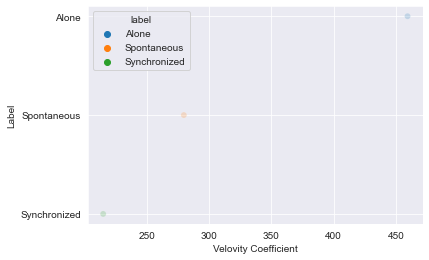

Subject 1 :


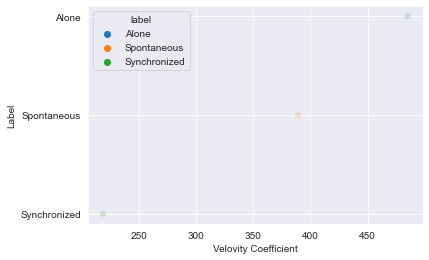

Subject 2 :


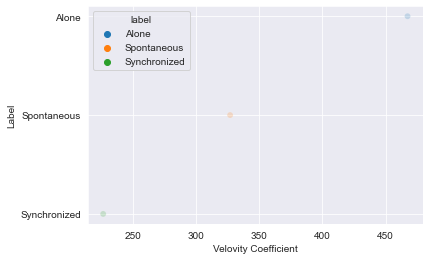

Subject 3 :


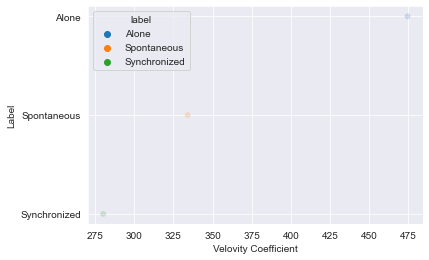

Subject 4 :


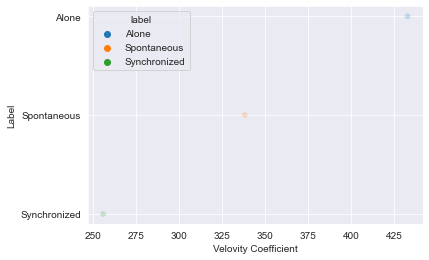

Subject 5 :


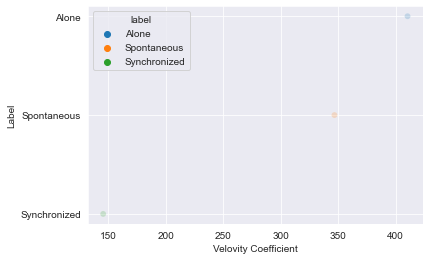

Subject 6 :


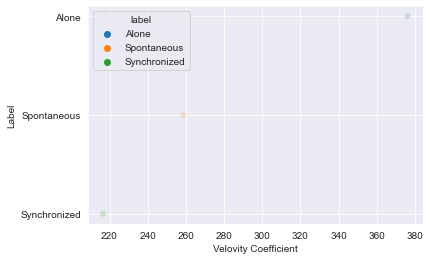

Subject 7 :


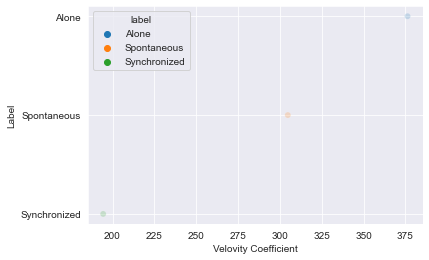

Subject 8 :


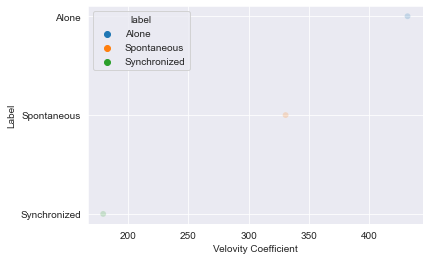

Subject 9 :


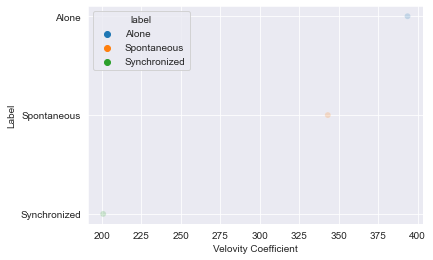

Subject 10 :


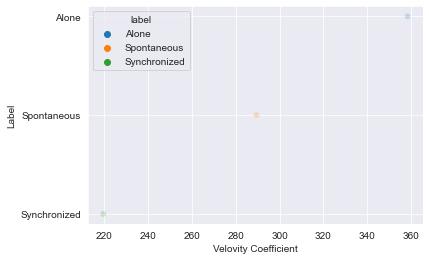

Subject 11 :


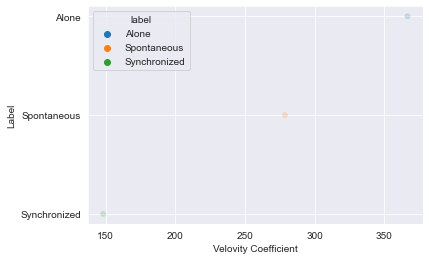

In [15]:
# Velocity vs label
# 1 -> spont   2 -> sync
mean_lst = lst.copy()
for i in range(len(lst)):
    print("Subject", str(i), ":")
    mean_lst[i] = lst[i].groupby(["label"]).mean()
    sns.scatterplot(x="velxyzTotal", y=mean_lst[i].index, hue=mean_lst[i].index, data=mean_lst[i], alpha=0.2)
    plt.xlabel('Velovity Coefficient')
    plt.ylabel('Label')
    plt.show()
# ==> the median velocity is higher when in spont

In [16]:
vel_mean_df = pd.DataFrame(index = ["Alone", "Spontaneous", "Synchronized"])
for i in range(len(mean_lst)):
    vel_mean_df[i] = mean_lst[i]["velxyzTotal"]
vel_mean_df

,0,1,2,3,4,5,6,7,8,9,10,11
Alone,459.366514,484.852169,467.412046,474.443938,432.585251,410.432135,376.065645,376.288259,431.998903,393.664597,358.340970,366.645429
Spontaneous,279.570689,388.996403,326.892672,334.113406,337.994947,346.826624,258.498597,304.743085,330.787408,343.145403,289.472377,278.738236
Synchronized,214.744270,218.762449,226.372196,280.138557,255.711363,145.510144,216.640019,194.396242,179.348748,200.774313,219.571866,148.223613


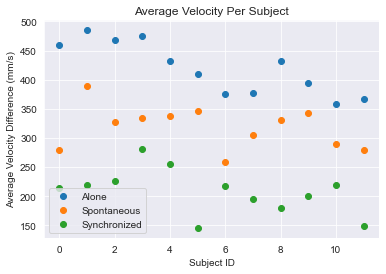

In [42]:
fig = plt.figure()
ax1 = fig.add_subplot(111)

ax1.scatter(vel_mean_df.columns, vel_mean_df.loc["Alone"], label='Alone')
ax1.scatter(vel_mean_df.columns, vel_mean_df.loc["Spontaneous"], label='Spontaneous')
ax1.scatter(vel_mean_df.columns, vel_mean_df.loc["Synchronized"], label='Synchronized')

plt.xlabel('Subject ID')
plt.ylabel('Average Velocity Difference (mm/s)')
plt.title("Average Velocity Per Subject")
plt.legend()

plt.savefig("avgVelDiff.png", dpi=600)
plt.show()

In [18]:
print(np.mean(vel_mean_df.loc["Alone"]))
print(np.mean(vel_mean_df.loc["Spontaneous"]))
print(np.mean(vel_mean_df.loc["Synchronized"]))
np.mean(vel_mean_df.loc["Spontaneous"].append(vel_mean_df.loc["Synchronized"]))

419.3413213225788
318.31498724138277
208.3494815630322


C:\Users\appel\AppData\Local\Temp\ipykernel_23060\1606921498.py:4: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  np.mean(vel_mean_df.loc["Spontaneous"].append(vel_mean_df.loc["Synchronized"]))


263.3322344022076

In [19]:
print(np.mean(totalDf[totalDf['label']=="Alone"]))


index                 1991.742374
PitchRight               0.426294
RollRight               -0.187132
YawRight                -0.129190
WristPosZRight         101.685757
ElbowPosYRight          57.648577
ElbowPosZRight         300.369740
GrabStrenthRight         0.063195
GrabAngleRight           0.604173
PinchStrengthRight       0.065681
TimeLeft                41.120265
PitchLeft                0.828024
RollLeft                 0.501050
YawLeft                  1.135494
WristPosXLeft         -126.514353
WristPosYLeft          180.809578
ElbowposXLeft         -301.774894
GrabStrenthLeft          0.167506
GrabAngleLeft            1.073085
PinchStrengthLeft        0.244460
PositionXDiff          -48.271349
PositionYDiff           -0.887663
PositionZDiff           12.009657
xyzTotal                 0.264925
velxyzTotal            421.688143
dtype: float64


C:\Users\appel\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
C:\Users\appel\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3430: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


In [20]:
print(np.mean(totalDf[totalDf['label']=="Spontaneous"]))

index                 385.444332
PitchRight              0.825187
RollRight              -0.601418
YawRight               -0.888935
WristPosZRight         58.893702
ElbowPosYRight         23.538984
ElbowPosZRight        141.833511
GrabStrenthRight        0.060181
GrabAngleRight          0.547366
PinchStrengthRight      0.058948
TimeLeft               40.872227
PitchLeft               0.915602
RollLeft                0.542873
YawLeft                 1.179783
WristPosXLeft        -168.169007
WristPosYLeft         167.530875
ElbowposXLeft        -327.891310
GrabStrenthLeft         0.139661
GrabAngleLeft           1.019230
PinchStrengthLeft       0.223012
PositionXDiff          21.287312
PositionYDiff          16.296255
PositionZDiff         -18.366315
xyzTotal                0.264327
velxyzTotal           319.483473
dtype: float64


C:\Users\appel\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
C:\Users\appel\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3430: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


In [21]:
print(np.mean(totalDf[totalDf['label']=="Synchronized"]))

index                 1192.864926
PitchRight               1.127803
RollRight               -1.039747
YawRight                -1.006973
WristPosZRight          57.823901
ElbowPosYRight           9.472350
ElbowPosZRight         117.514247
GrabStrenthRight         0.062301
GrabAngleRight           0.372654
PinchStrengthRight       0.031427
TimeLeft               165.309691
PitchLeft                1.225594
RollLeft                 1.150946
YawLeft                  0.992309
WristPosXLeft         -155.174680
WristPosYLeft          162.840931
ElbowposXLeft         -312.524306
GrabStrenthLeft          0.061029
GrabAngleLeft            0.448868
PinchStrengthLeft        0.096325
PositionXDiff           -7.420187
PositionYDiff           11.165496
PositionZDiff            2.143634
xyzTotal                 0.150660
velxyzTotal            212.081561
dtype: float64


C:\Users\appel\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
C:\Users\appel\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3430: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


In [22]:
pos_mean_df = pd.DataFrame(index = ["Alone", "Spontaneous", "Synchronized"])
for i in range(len(mean_lst)):
    pos_mean_df[i] = mean_lst[i]["xyzTotal"]
pos_mean_df

,0,1,2,3,4,5,6,7,8,9,10,11
Alone,76.403807,95.620679,86.101487,90.606916,83.895547,86.137482,111.702947,143.735286,79.850634,93.688904,64.414347,89.043268
Spontaneous,78.765661,105.027682,99.900253,94.543451,80.493762,72.295453,91.508902,113.212263,89.792968,77.246638,122.473489,65.279050
Synchronized,41.739337,54.243808,52.690073,61.567961,75.971502,45.889411,53.084133,45.726943,58.484256,53.090729,47.770476,37.870824


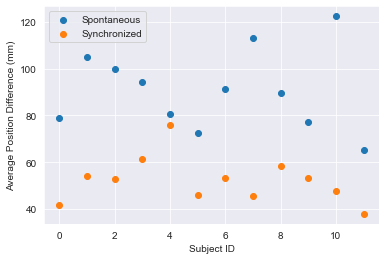

In [23]:
fig = plt.figure()
ax1 = fig.add_subplot(111)

# ax1.scatter(pos_mean_df.columns, pos_mean_df.loc["Alone"], label='Alone')
ax1.scatter(pos_mean_df.columns, pos_mean_df.loc["Spontaneous"], label='Spontaneous')
ax1.scatter(pos_mean_df.columns, pos_mean_df.loc["Synchronized"], label='Synchronized')

plt.xlabel('Subject ID')
plt.ylabel('Average Position Difference (mm)')
plt.legend()

plt.savefig("avgPosDiff.png", dpi=600)

plt.show()

In [24]:
print(np.mean(pos_mean_df.loc["Alone"]))
print(np.mean(pos_mean_df.loc["Spontaneous"]))
print(np.mean(pos_mean_df.loc["Synchronized"]))

91.76677532694175
90.87829770129821
52.34412099625797


In [36]:
# for i in range(len(lst)):
#     print("Subject", str(i), ":")
#     sns.scatterplot(x="TimeLeft", y="xyzTotal", hue="label", data=lst[i])
#     plt.xlabel('Time')
#     plt.ylabel('Position Differnece')
#     plt.show()

In [26]:
def printGraphs(i):
#     print("Subject", str(i), ":")
    spon = lst[i][lst[i]['label'] == 'Spontaneous']
    sync = lst[i][lst[i]['label'] == 'Synchronized']

    spon = spon.sort_values(by=['TimeLeft'])
    spon["TimeLeft"] = spon["TimeLeft"] - spon["TimeLeft"].iloc[0]

    sync = sync.sort_values(by=['TimeLeft'])
    sync["TimeLeft"] = sync["TimeLeft"] - sync["TimeLeft"].iloc[0]

    spon_x = spon["TimeLeft"]
    spon_y = spon["xyzTotal"]

    avg = np.mean(spon["xyzTotal"])
    print(avg)
    ypoints = []
    for i in range(70):
        ypoints.append(avg)
    ypoints = np.array(ypoints)



    sync_x = sync["TimeLeft"]
    sync_y = sync["xyzTotal"]

    f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
    f.set_size_inches(10, 6)
    ax1.scatter(spon_x, spon_y,c='y', alpha=0.2)
    ax1.plot(ypoints, color = 'r')
    ax1.annotate("Average: " + str(round(avg, 2)) + "mm", xy=(0, avg + 5))
    ax1.set_title("Spontaneous")

    avg = np.mean(sync["xyzTotal"])
    ypoints = []
    for i in range(80):
        ypoints.append(avg)
    ypoints = np.array(ypoints)

    ax2.scatter(sync_x, sync_y,c='g', alpha=0.2)
    ax2.plot(ypoints, color = 'r')
    ax2.annotate("Average: " + str(round(avg, 2)) + "mm", xy=(0, avg + 5))
    ax2.set_title("Synchronized")
    
    ax1.set_xlabel('Time')
    ax1.set_ylabel('Position Difference (mm)')
    ax2.set_xlabel('Time')
    ax2.set_ylabel('Position Difference (mm)')

    plt.savefig("posDiffVsTime.png", dpi=600)
    plt.show()

122.47348940406769


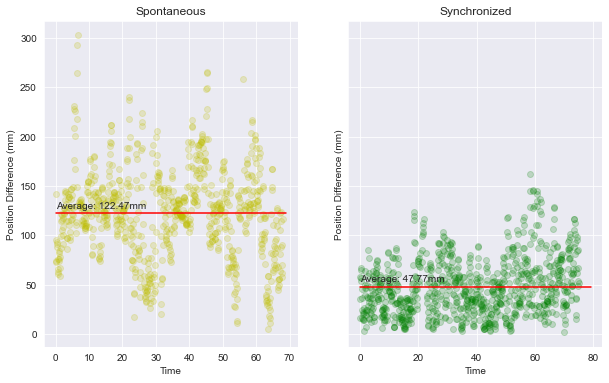

In [27]:
# for i in range(len(lst)):
printGraphs(-2)

In [40]:
def printGraphsVel(i):
    spon = lst[i][lst[i]['label'] == 'Spontaneous']
    sync = lst[i][lst[i]['label'] == 'Synchronized']

    spon = spon.sort_values(by=['TimeLeft'])
    spon["TimeLeft"] = spon["TimeLeft"] - spon["TimeLeft"].iloc[0]

    sync = sync.sort_values(by=['TimeLeft'])
    sync["TimeLeft"] = sync["TimeLeft"] - sync["TimeLeft"].iloc[0]

    spon_x = spon["TimeLeft"]
    spon_y = spon["velxyzTotal"]

    sync = sync[sync["TimeLeft"] <= 70]
    print("sync: " + str(np.std(sync["velxyzTotal"])))
    print("spont: " + str(np.std(spon["velxyzTotal"])))

    sync_x = sync["TimeLeft"]
    sync_y = sync["velxyzTotal"]

    avg = np.mean(spon["velxyzTotal"])
    ypoints = []
    for i in range(70):
        ypoints.append(avg)
    ypoints = np.array(ypoints)


    f, (ax1, ax2) = plt.subplots(1, 2, sharey=True, sharex=True)
    f.set_size_inches(10, 6)
    ax1.scatter(spon_x, spon_y,c='y', alpha=0.2)
    ax1.plot(ypoints, color = 'r')
    ax1.annotate("Average: " + str(round(avg, 2)) + "mm/s, std: " + str(round(np.std(spon["velxyzTotal"]), 2)), xy=(0, avg + 5))
    ax1.set_title("Spontaneous")


    avg = np.mean(sync["velxyzTotal"])
    ypoints = []
    for i in range(70):
        ypoints.append(avg)
    ypoints = np.array(ypoints)

    ax2.scatter(sync_x, sync_y,c='g', alpha=0.2)
    ax2.plot(ypoints, color = 'r')
    ax2.annotate("Average: " + str(round(avg, 2)) + "mm/s, std: " + str(round(np.std(sync["velxyzTotal"]), 2)), xy=(0, avg + 5))
    ax2.set_title("Synchronized")
    
    ax1.set_xlabel('Time')
    ax1.set_ylabel('Velocity difference (mm/s)')
    ax2.set_xlabel('Time')
    ax2.set_ylabel('Velocity difference (mm/s)')

    plt.savefig("velDiffVsTime.png", dpi=600)
    plt.show()

sync: 121.29409952845424
spont: 197.0444531972558


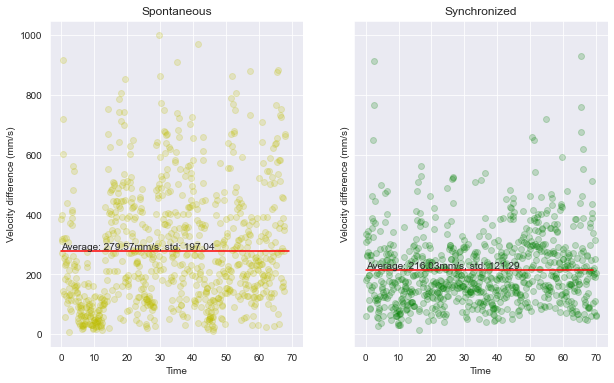

In [41]:
# for i in range(len(lst)):
printGraphsVel(0)

In [34]:
lst[5].to_csv('Data/lst5.csv')

In [29]:
# # Velocity vs time
# # 1 -> spont   2 -> sync
# for i in range(len(lst)):
#     print("Subject", str(i), ":")
#     sns.scatterplot(x="TimeLeft", y="velxyzTotal", hue="label", data=lst[i])
#     plt.xlabel('Time')
#     plt.ylabel('Velocity Differnece')
#     plt.show()
#
# # ==> The outliers are more pronounced in sync due to people trying to correlate